In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional.csv
/kaggle/input/bank-marketing/bank.csv
/kaggle/input/bank-marketing/bank-names.txt
/kaggle/input/bank-marketing/.Rhistory
/kaggle/input/bank-marketing/bank-full.csv
/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    f1_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("✓ All libraries imported successfully")


✓ All libraries imported successfully


In [3]:
# Cell 2: Load Data
print("="*80)
print("LOADING BANK MARKETING DATASET")
print("="*80)

# Try different file paths for Kaggle
file_paths = [
    "/kaggle/input/bank-marketing/bank-additional-full.csv",
    "/kaggle/input/bank-marketing/bank-full.csv",
    "/kaggle/input/bank-marketing/bank-additional.csv",
    "/kaggle/input/bank-marketing/bank.csv",
]

df = None
loaded_file = None

for path in file_paths:
    try:
        df = pd.read_csv(path, sep=";")
        if df.shape[1] > 1:
            loaded_file = path
            print(f"✓ Successfully loaded: {path}")
            break
    except Exception as e:
        continue

if df is None or df.shape[1] <= 1:
    print("⚠ Could not load from Kaggle paths. Trying comma separator...")
    for path in file_paths:
        try:
            df = pd.read_csv(path, sep=",")
            if df.shape[1] > 1:
                loaded_file = path
                print(f"✓ Successfully loaded: {path}")
                break
        except:
            continue

if df is None:
    raise FileNotFoundError("Dataset not found. Check file paths.")

print(f"\nDataset Info:")
print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"  Memory: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
print(f"\nColumns: {list(df.columns)}")


LOADING BANK MARKETING DATASET
✓ Successfully loaded: /kaggle/input/bank-marketing/bank-additional-full.csv

Dataset Info:
  Shape: 41188 rows × 21 columns
  Memory: 30.26 MB

Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [4]:
# Cell 3: Exploratory Data Analysis
print("="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Display first rows
print("\nFirst 5 rows:")
display(df.head())

# Dataset info
print("\nDataset Info:")
print(df.info())

# Missing values
print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  ✓ No missing values!")
else:
    print(missing[missing > 0])

# Target distribution
print("\nTarget Variable Distribution (y):")
print(df['y'].value_counts())
print("\nPercentage:")
print(df['y'].value_counts(normalize=True) * 100)

# Numerical summary
print("\nNumerical Features Summary:")
display(df.describe())


EXPLORATORY DATA ANALYSIS

First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


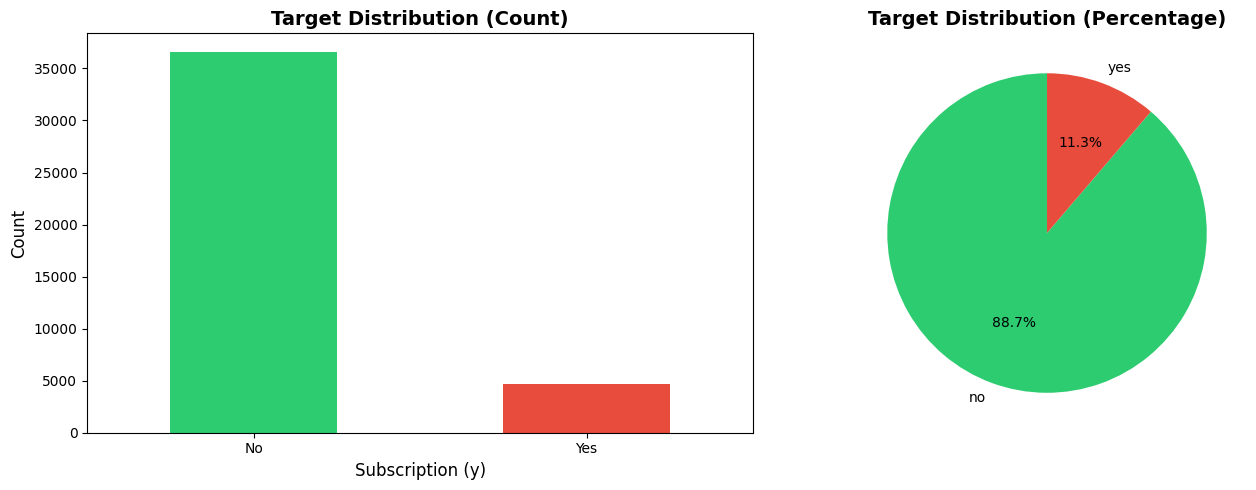

In [6]:
# Cell 4: Visualize Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['y'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Target Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Subscription (y)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Percentage plot
df['y'].value_counts(normalize=True).plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                          colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Target Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [7]:
# Cell 5: Data Preprocessing
print("="*80)
print("DATA PREPROCESSING")
print("="*80)

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

print(f"\nFeatures (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"\nTarget Encoding:")
for i, cls in enumerate(le_target.classes_):
    count = np.sum(y_encoded == i)
    print(f"  '{cls}' → {i} ({count} samples, {count/len(y)*100:.2f}%)")

# Encode categorical features
X_encoded = X.copy()
label_encoders = {}

print(f"\nEncoding Categorical Features:")
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  ✓ {col}: {len(le.classes_)} unique values → [0-{len(le.classes_)-1}]")

print(f"\n✓ Preprocessing complete!")
print(f"  Final feature matrix: {X_encoded.shape}")


DATA PREPROCESSING

Features (X): (41188, 20)
Target (y): (41188,)

Categorical features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Target Encoding:
  'no' → 0 (36548 samples, 88.73%)
  'yes' → 1 (4640 samples, 11.27%)

Encoding Categorical Features:
  ✓ job: 12 unique values → [0-11]
  ✓ marital: 4 unique values → [0-3]
  ✓ education: 8 unique values → [0-7]
  ✓ default: 3 unique values → [0-2]
  ✓ housing: 3 unique values → [0-2]
  ✓ loan: 3 unique values → [0-2]
  ✓ contact: 2 unique values → [0-1]
  ✓ month: 10 unique values → [0-9]
  ✓ day_of_week: 5 unique values → [0-4]
  ✓ poutcome: 3 unique values → [0-2]

✓ Preprocessing complete!
  Final feature matrix: (41188, 20)


In [8]:
# Cell 6: Train-Test Split
print("="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"\nTrain-Test Split (80-20):")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples:  {X_test.shape[0]}")

print(f"\nClass Distribution:")
print(f"  Training set:")
for i, cls in enumerate(le_target.classes_):
    count = np.sum(y_train == i)
    print(f"    {cls}: {count} ({count/len(y_train)*100:.2f}%)")

print(f"  Testing set:")
for i, cls in enumerate(le_target.classes_):
    count = np.sum(y_test == i)
    print(f"    {cls}: {count} ({count/len(y_test)*100:.2f}%)")


TRAIN-TEST SPLIT

Train-Test Split (80-20):
  Training samples: 32950
  Testing samples:  8238

Class Distribution:
  Training set:
    no: 29238 (88.73%)
    yes: 3712 (11.27%)
  Testing set:
    no: 7310 (88.74%)
    yes: 928 (11.26%)


In [9]:
# Cell 7: Train Decision Tree Models
print("="*80)
print("MODEL TRAINING")
print("="*80)

# Model 1: Gini Impurity
print("\n[1/3] Training Decision Tree (Gini Impurity)...")
dt_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)
dt_gini.fit(X_train, y_train)
print("  ✓ Gini model trained successfully")

# Model 2: Entropy (Information Gain)
print("\n[2/3] Training Decision Tree (Entropy)...")
dt_entropy = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)
dt_entropy.fit(X_train, y_train)
print("  ✓ Entropy model trained successfully")

# Model 3: Balanced (for imbalanced data)
print("\n[3/3] Training Balanced Decision Tree...")
dt_balanced = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    class_weight='balanced',
    random_state=42
)
dt_balanced.fit(X_train, y_train)
print("  ✓ Balanced model trained successfully")

print("\n✓ All 3 models trained successfully!")


MODEL TRAINING

[1/3] Training Decision Tree (Gini Impurity)...
  ✓ Gini model trained successfully

[2/3] Training Decision Tree (Entropy)...
  ✓ Entropy model trained successfully

[3/3] Training Balanced Decision Tree...
  ✓ Balanced model trained successfully

✓ All 3 models trained successfully!


In [10]:
# Cell 8: Model Evaluation
print("="*80)
print("MODEL EVALUATION")
print("="*80)

models = {
    'Gini Impurity': dt_gini,
    'Entropy': dt_entropy,
    'Balanced Gini': dt_balanced
}

results = []

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"MODEL: {name}")
    print(f"{'='*80}")
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    print(f"\nAccuracy:")
    print(f"  Training:   {train_acc*100:.2f}%")
    print(f"  Testing:    {test_acc*100:.2f}%")
    print(f"  Difference: {abs(train_acc - test_acc)*100:.2f}%")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nConfusion Matrix:")
    print(f"                Predicted NO  Predicted YES")
    print(f"  Actual NO         {tn:>6}         {fp:>6}")
    print(f"  Actual YES        {fn:>6}         {tp:>6}")
    
    # Metrics
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_proba_test)
    
    print(f"\nMetrics:")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC:  {roc_auc:.4f}")
    
    # Store results
    results.append({
        'Model': name,
        'Train_Acc': train_acc * 100,
        'Test_Acc': test_acc * 100,
        'F1_Score': f1,
        'ROC_AUC': roc_auc,
        'Tree_Depth': model.get_depth(),
        'Num_Leaves': model.get_n_leaves()
    })

# Display comparison
print(f"\n{'='*80}")
print("MODEL COMPARISON SUMMARY")
print(f"{'='*80}")
results_df = pd.DataFrame(results)
display(results_df)

# Best model
best_idx = results_df['Test_Acc'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {results_df.loc[best_idx, 'Test_Acc']:.2f}%")


MODEL EVALUATION

MODEL: Gini Impurity

Accuracy:
  Training:   92.69%
  Testing:    92.05%
  Difference: 0.64%

Confusion Matrix:
                Predicted NO  Predicted YES
  Actual NO           7061            249
  Actual YES           406            522

Metrics:
  F1-Score: 0.6145
  ROC-AUC:  0.9446

MODEL: Entropy

Accuracy:
  Training:   92.59%
  Testing:    91.70%
  Difference: 0.90%

Confusion Matrix:
                Predicted NO  Predicted YES
  Actual NO           7053            257
  Actual YES           427            501

Metrics:
  F1-Score: 0.5943
  ROC-AUC:  0.9416

MODEL: Balanced Gini

Accuracy:
  Training:   85.54%
  Testing:    84.62%
  Difference: 0.92%

Confusion Matrix:
                Predicted NO  Predicted YES
  Actual NO           6107           1203
  Actual YES            64            864

Metrics:
  F1-Score: 0.5770
  ROC-AUC:  0.9335

MODEL COMPARISON SUMMARY


,Model,Train_Acc,Test_Acc,F1_Score,ROC_AUC,Tree_Depth,Num_Leaves
0,Gini Impurity,92.688923,92.049041,0.614479,0.944637,10,227
1,Entropy,92.594841,91.697014,0.594306,0.941623,10,246
2,Balanced Gini,85.541730,84.620053,0.576962,0.933522,10,268



🏆 BEST MODEL: Gini Impurity
   Test Accuracy: 92.05%


DETAILED CLASSIFICATION REPORT (BEST MODEL)

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7310
         yes       0.66      0.54      0.59       928

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



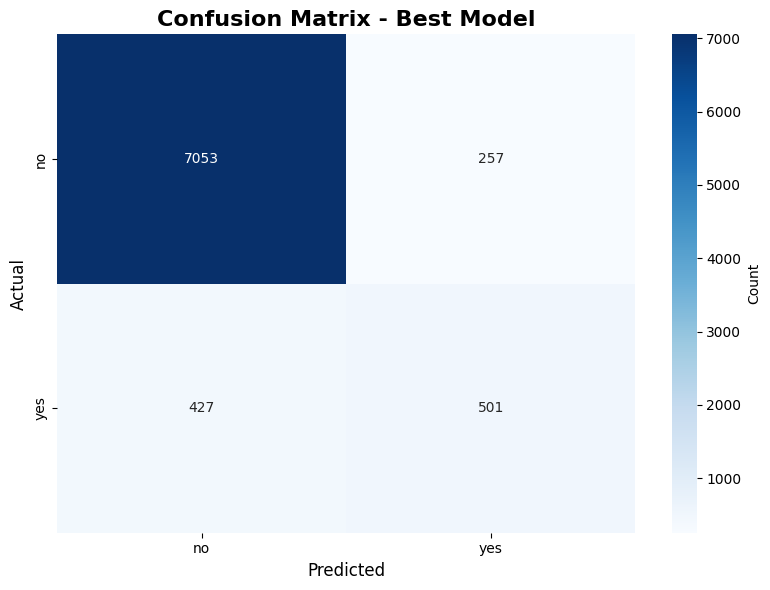

In [11]:
# Cell 9: Detailed Classification Report
# Use best model (usually Entropy)
best_model = dt_entropy

print("="*80)
print("DETAILED CLASSIFICATION REPORT (BEST MODEL)")
print("="*80)

y_pred_final = best_model.predict(X_test)
y_proba_final = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=le_target.classes_))

# Confusion Matrix with visualization
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Best Model', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()


DECISION TREE VISUALIZATION


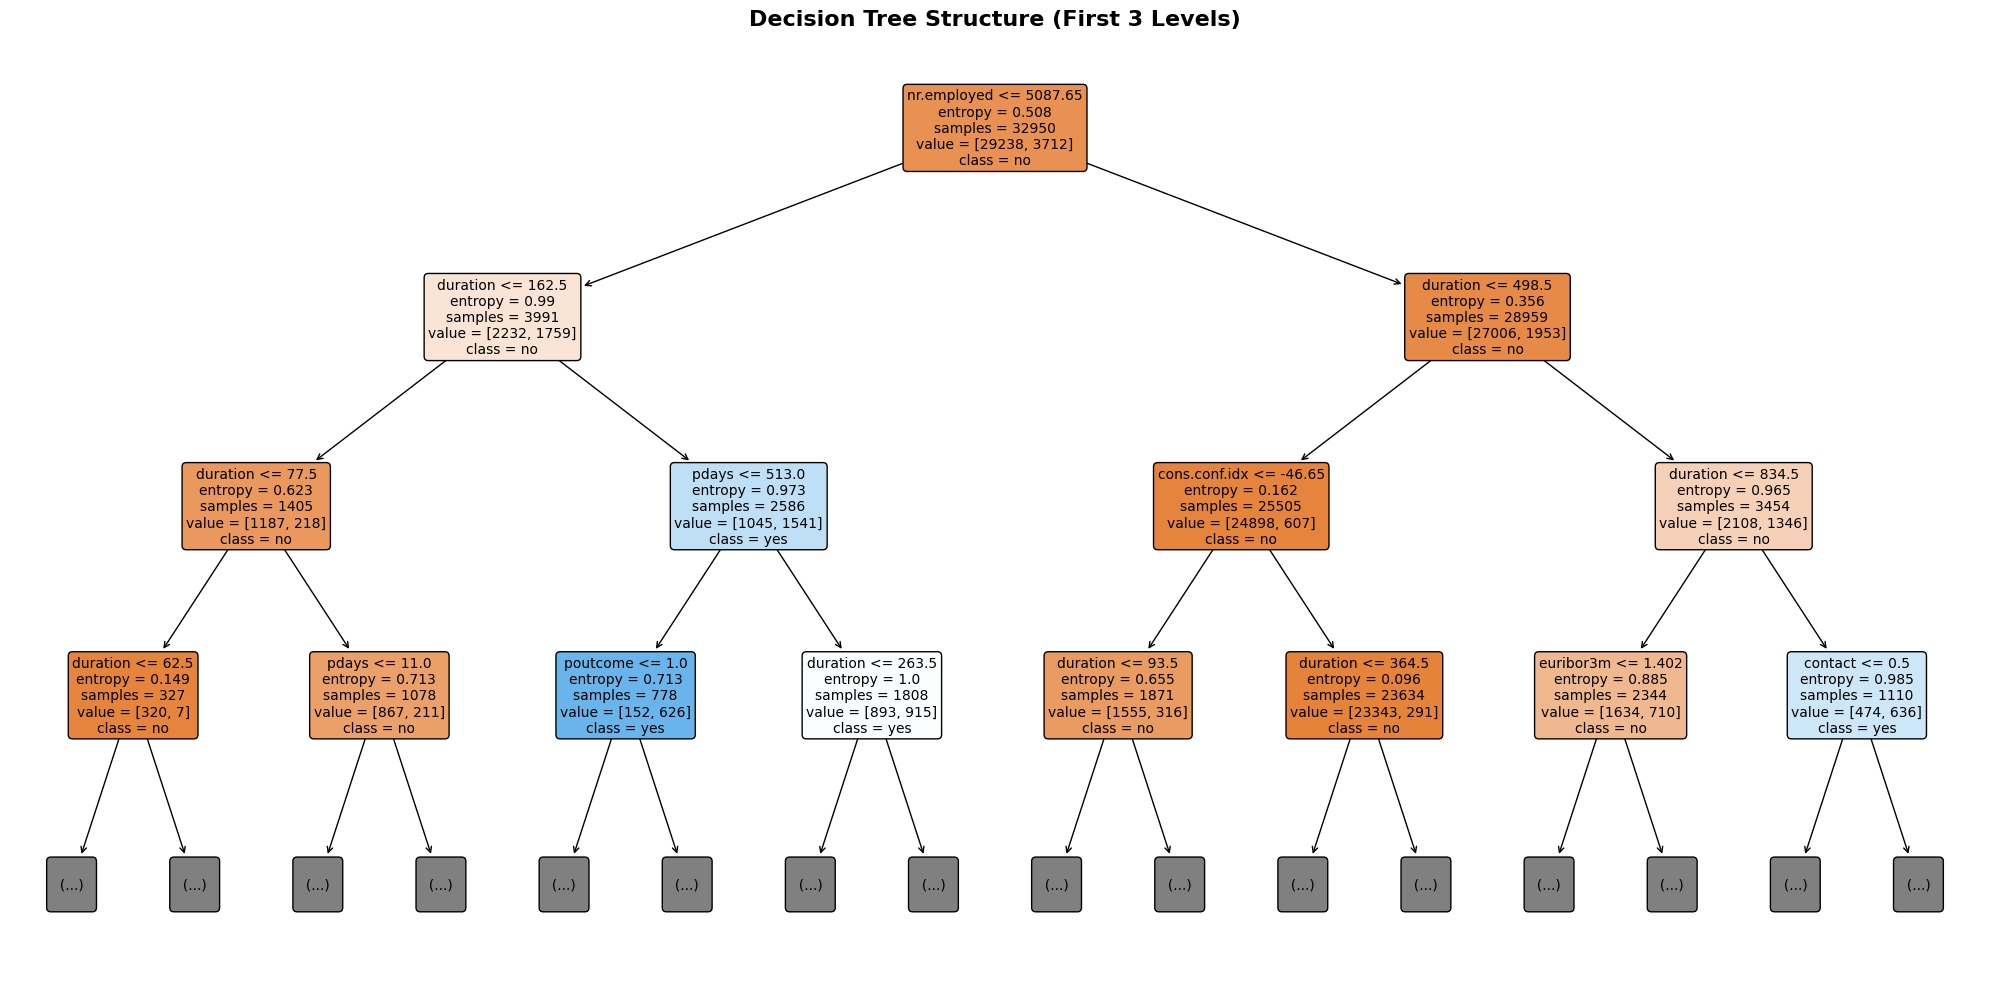


Tree Statistics:
  Total Depth: 10
  Total Nodes: 491
  Leaf Nodes:  246


In [12]:
# Cell 11: Visualize Decision Tree (First 3 levels)
print("="*80)
print("DECISION TREE VISUALIZATION")
print("="*80)

plt.figure(figsize=(20, 10))
plot_tree(best_model, 
          max_depth=3,  # Show only first 3 levels for clarity
          feature_names=X_encoded.columns,
          class_names=le_target.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Structure (First 3 Levels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nTree Statistics:")
print(f"  Total Depth: {best_model.get_depth()}")
print(f"  Total Nodes: {best_model.tree_.node_count}")
print(f"  Leaf Nodes:  {best_model.get_n_leaves()}")
